# 기존 04-3 에서 진행했전 부분을 떼어놓은 파일입니다. <br>
# 확인을 위해 PCA 분석과 랜덤 포레스트 모델로 진행한 부분입니다. <br>
# 코드가 꼬여있고, 실행을 누르면 오류가 발생할 것이기에 그저 살펴만 봐주세요.

우선 null값 전부 제외한 데이터 프레임으로 PCA분석 진행
 - 주성분 분석을 통해 데이터 차원을 줄이기 위해서

In [ ]:
df_all_clean = df.dropna()
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41586 entries, 0 to 84153
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        41586 non-null  int64  
 1   호스트_id       41586 non-null  int64  
 2   url          41586 non-null  object 
 3   슈퍼호스트        41586 non-null  object 
 4   숙소_수         41586 non-null  float64
 5   숙소_지역        41586 non-null  object 
 6   숙소_유형        41586 non-null  object 
 7   숙소_특징        41586 non-null  object 
 8   수용_인원수       41586 non-null  int64  
 9   욕실수          41586 non-null  float64
 10  침실수          41586 non-null  float64
 11  침대수          41586 non-null  float64
 12  편의시설         41586 non-null  object 
 13  숙소_가격        41586 non-null  object 
 14  최소_숙박일       41586 non-null  int64  
 15  최대_숙박일       41586 non-null  int64  
 16  리뷰수          41586 non-null  int64  
 17  30일_리뷰수      41586 non-null  int64  
 18  리뷰점수         41586 non-null  float64
 19  숙소_정확성_리뷰

In [ ]:
# 불필요한 컬럼 제거
df_all_clean.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설'], inplace=True)

C:\Users\rladn\AppData\Local\Temp\ipykernel_5740\1237394265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_clean.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설'], inplace=True)


In [ ]:
df_all_clean.dtypes

슈퍼호스트           object
숙소_수           float64
숙소_지역           object
숙소_유형           object
숙소_특징           object
수용_인원수           int64
욕실수            float64
침실수            float64
침대수            float64
숙소_가격           object
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

PCA 분석을 위한 범주형 데이터 원핫 인코딩
 - 슈퍼호스트, 숙소_지역, 숙소_유형, 숙소_특징

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # 원-핫 인코딩 수행할 열 목록
# columns_to_encode = ['슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징']

# # 원-핫 인코딩 인스턴스 생성
# onehot_encoder = OneHotEncoder(sparse=False)

# # 원-핫 인코딩 수행
# encoded_features = onehot_encoder.fit_transform(df_all_clean[columns_to_encode])

# # 원-핫 인코딩 결과를 DataFrame으로 변환
# encoded_features_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# # 원본 데이터프레임과 원-핫 인코딩 결과 결합
# df_all_clean = pd.concat([df_all_clean, encoded_features_df], axis=1)

# # 원본 '숙소_지역' 및 '숙소_특징' 열 제거
# df_all_clean.drop(columns=columns_to_encode, inplace=True)

# # 결과 확인
# print(df_all_clean.head())


   숙소_수  수용_인원수  욕실수  침실수  침대수    숙소_가격  최소_숙박일  최대_숙박일    리뷰수  30일_리뷰수  ...  \
0   2.0     2.0  1.0  1.0  1.0  $250.00     2.0    30.0    4.0      0.0  ...   
1   1.0     2.0  1.0  0.0  1.0  $140.00     3.0   365.0  106.0      0.0  ...   
2   3.0     2.0  1.0  0.0  1.0  $107.00     1.0  1125.0  393.0      5.0  ...   
3   3.0     4.0  1.0  1.0  1.0  $200.00     2.0   120.0   78.0      0.0  ...   
6   9.0     4.0  1.0  2.0  2.0  $134.00    10.0   130.0  348.0      2.0  ...   

   숙소_특징_Shared room in farm stay  숙소_특징_Shared room in guest suite  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
6                             0.0                               0.0   

   숙소_특징_Shared room in home  숙소_특징_Shared room in hostel  \
0                        0.0   

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# 숙소_가격의 '$' 기호와 ',' 제거 후 실수(float) 형태로 변환
df_all_clean['숙소_가격'] = df_all_clean['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 결과 확인
print(df_all_clean['숙소_가격'].dtype)


float64


In [ ]:
print(df_all_clean['숙소_가격'])

0        250.0
1        140.0
2        107.0
3        200.0
6        134.0
         ...  
41566      NaN
41567      NaN
41579      NaN
41581      NaN
41582      NaN
Name: 숙소_가격, Length: 62829, dtype: float64


In [ ]:
df_all_clean.isnull().sum()

숙소_수                                21243
수용_인원수                              21243
욕실수                                 21243
침실수                                 21243
침대수                                 21243
                                    ...  
숙소_특징_Shared room in loft           21243
숙소_특징_Shared room in rental unit    21243
숙소_특징_Shared room in tiny home      21243
숙소_특징_Shared room in townhouse      21243
숙소_특징_Tiny home                     21243
Length: 100, dtype: int64

In [ ]:
df_all_clean.dtypes

숙소_수                                float64
수용_인원수                              float64
욕실수                                 float64
침실수                                 float64
침대수                                 float64
                                     ...   
숙소_특징_Shared room in loft           float64
숙소_특징_Shared room in rental unit    float64
숙소_특징_Shared room in tiny home      float64
숙소_특징_Shared room in townhouse      float64
숙소_특징_Tiny home                     float64
Length: 100, dtype: object

In [ ]:
# '숙소_가격' 열을 제외한 모든 열 선택
df_all_clean_noprice = df_all_clean.drop(columns=['숙소_가격'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 데이터 준비 (숙소_가격 컬럼 제외)
df_all_clean_noprice = df_all_clean.drop(['숙소_가격'], axis=1) # '숙소_가격' 컬럼 제외한 데이터프레임 생성
x = df_all_clean_noprice.values # 독립변인들의 value값만 추출
y = df_all_clean['숙소_가격'].values # 종속변인 추출

# 결측값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# 표준화
x_standardized = StandardScaler().fit_transform(x_imputed) # x객체에 x를 표준화한 데이터를 저장

features = df_all_clean_noprice.columns # '숙소_가격'을 제외한 컬럼명 추출

# 표준화된 데이터를 데이터프레임으로 변환
standardized_df = pd.DataFrame(x_standardized, columns=features)
print(standardized_df.head())


       숙소_수    수용_인원수       욕실수       침실수       침대수    최소_숙박일    최대_숙박일  \
0 -0.307246 -0.910632 -0.428984 -0.341399 -0.757203 -0.243585 -0.006077   
1 -0.315781 -0.910632 -0.428984 -1.681664 -0.757203 -0.215015 -0.006038   
2 -0.298712 -0.910632 -0.428984 -1.681664 -0.757203 -0.272155 -0.005950   
3 -0.298712  0.511645 -0.428984 -0.341399 -0.757203 -0.243585 -0.006067   
4 -0.247504  0.511645 -0.428984  0.998866  0.239917 -0.015024 -0.006066   

        리뷰수   30일_리뷰수      리뷰점수  ...  숙소_특징_Shared room in farm stay  \
0 -0.573812 -0.626230  0.866167  ...                       -0.006028   
1  1.257863 -0.626230 -0.124891  ...                       -0.006028   
2  6.411691  3.503156 -0.372655  ...                       -0.006028   
3  0.755050 -0.626230 -0.496537  ...                       -0.006028   
4  5.603599  1.025525  0.029962  ...                       -0.006028   

   숙소_특징_Shared room in guest suite  숙소_특징_Shared room in home  \
0                         -0.006028               

In [ ]:
# PCA 적용
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x_standardized)
principalDf = pd.DataFrame(data=principalComponents, columns=features)

print(pca.explained_variance_ratio_)


[4.91927183e-02 3.58848583e-02 2.96109013e-02 2.14208030e-02
 2.07794175e-02 1.98850017e-02 1.72005134e-02 1.34506818e-02
 1.15370619e-02 1.14913648e-02 1.13767826e-02 1.13204427e-02
 1.11389162e-02 1.11197756e-02 1.10816805e-02 1.10010773e-02
 1.09485183e-02 1.09254934e-02 1.08845693e-02 1.08687589e-02
 1.08192430e-02 1.07790049e-02 1.07532157e-02 1.07027825e-02
 1.06371379e-02 1.06302291e-02 1.05440990e-02 1.03180769e-02
 1.02665490e-02 1.02159198e-02 1.01704544e-02 1.01578328e-02
 1.01394571e-02 1.01239804e-02 1.01163980e-02 1.01144712e-02
 1.01119965e-02 1.01113231e-02 1.01089190e-02 1.01077902e-02
 1.01070592e-02 1.01062820e-02 1.01053417e-02 1.01045244e-02
 1.01040025e-02 1.01035418e-02 1.01032385e-02 1.01028228e-02
 1.01026195e-02 1.01022542e-02 1.01021674e-02 1.01019917e-02
 1.01018185e-02 1.01016876e-02 1.01015277e-02 1.01014417e-02
 1.01014081e-02 1.01012956e-02 1.01012538e-02 1.00767206e-02
 1.00602864e-02 1.00442689e-02 1.00196312e-02 1.00098493e-02
 9.97076351e-03 9.938787

In [ ]:
# PCA 모델 훈련
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x_standardized)

# 각 주성분의 구성요소 확인
components = pca.components_

# 첫 번째 주성분의 구성요소 출력
print("첫 번째 주성분의 구성요소:")
for i, component in enumerate(components[0]):
    print(f"{features[i]} 기여도: {component}")

첫 번째 주성분의 구성요소:
숙소_수 기여도: 0.08372145512274938
수용_인원수 기여도: 0.0016678050537288769
욕실수 기여도: -0.025320689049259437
침실수 기여도: -0.03227315388575708
침대수 기여도: -0.0018549075454187824
최소_숙박일 기여도: 0.0283743688454998
최대_숙박일 기여도: -0.00019881800752418052
리뷰수 기여도: -0.028539019276825884
30일_리뷰수 기여도: -0.02716142734077152
리뷰점수 기여도: -0.4201484065971159
숙소_정확성_리뷰점수 기여도: -0.4038058623187798
숙소_청결도_리뷰점수 기여도: -0.3637825250286398
숙소_체크인_리뷰점수 기여도: -0.357263009013727
숙소_소통_리뷰점수 기여도: -0.3789833242465672
숙소_위치_리뷰점수 기여도: -0.28680016514951123
숙소_가격_리뷰점수 기여도: -0.4029580292304178
평균_리뷰수 기여도: -0.02665963437911116
슈퍼호스트_f 기여도: 0.004205342865620974
슈퍼호스트_t 기여도: -0.004205342865620973
숙소_지역_Batignolles-Monceau 기여도: -0.0033607404977165274
숙소_지역_Bourse 기여도: 0.0027008599306870868
숙소_지역_Buttes-Chaumont 기여도: -0.0005626489203364141
숙소_지역_Buttes-Montmartre 기여도: 0.00164399296312021
숙소_지역_Entrepôt 기여도: -0.0007484975096405478
숙소_지역_Gobelins 기여도: 0.0009927399784836089
숙소_지역_Hôtel-de-Ville 기여도: 0.0006309093643067571
숙소_지역_Louvre 기여도: 

컬럼 수가 100개가 되니 확인 이 어려움.

슈퍼호스트, 숙소_지역, 유형, 특징까지 포함하려면 원핫 인코딩을 진행해야함.
 - 라벨링 인코딩은 안됨. (PCA 분석 시 순서가 있는 데이터라 판단되기 때문. >> 그래서 원핫 인코딩으로 해야 함.)<br>
 --- 순서의 의미: 라벨 인코딩된 범주형 데이터는 수치형 데이터로 변환되지만, 이러한 변환된 수치에는 순서가 의미가 없습니다. PCA는 이러한 수치를 연속적인 수치형 데이터로 간주하고 분석하므로, 왜곡된 결과를 초래할 수 있습니다.<br>

그래서 위 4개(슈퍼호스트, 숙소_지역,유형,특징)을 제외한 나머지 값들만 pca 진행
 - 이미 위에서 원핫 인코딩 진행하여 오류 발생(null값 발생)
 - 위 코드 주석으로 변환 후 다시 진행하겠음.

In [ ]:
len(df_all_clean.columns)

100

In [ ]:
# 불필요한 컬럼 제거
# 코드 꼬인 부분임
df_all_clean.drop(columns=['슈퍼호스트','숙소_지역','숙소_유형','숙소_특징'], inplace=True)

KeyError: "['슈퍼호스트', '숙소_지역', '숙소_유형', '숙소_특징'] not found in axis"

In [ ]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41586 entries, 0 to 84153
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         41586 non-null  float64
 1   수용_인원수       41586 non-null  int64  
 2   욕실수          41586 non-null  float64
 3   침실수          41586 non-null  float64
 4   침대수          41586 non-null  float64
 5   숙소_가격        41586 non-null  float64
 6   최소_숙박일       41586 non-null  int64  
 7   최대_숙박일       41586 non-null  int64  
 8   리뷰수          41586 non-null  int64  
 9   30일_리뷰수      41586 non-null  int64  
 10  리뷰점수         41586 non-null  float64
 11  숙소_정확성_리뷰점수  41586 non-null  float64
 12  숙소_청결도_리뷰점수  41586 non-null  float64
 13  숙소_체크인_리뷰점수  41586 non-null  float64
 14  숙소_소통_리뷰점수   41586 non-null  float64
 15  숙소_위치_리뷰점수   41586 non-null  float64
 16  숙소_가격_리뷰점수   41586 non-null  float64
 17  평균_리뷰수       41586 non-null  float64
dtypes: float64(13), int64(5)
memory usage: 6.0 MB


In [ ]:
df_all_clean.columns

Index(['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일',
       '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 준비 (숙소_가격 컬럼 제외)
x = df_all_clean.drop(['숙소_가격'], axis=1).values # 독립변인들의 value값만 추출
y = df_all_clean['숙소_가격'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['숙소_수', '수용_인원수', '욕실수', '침실수', '침대수', '최소_숙박일', '최대_숙박일','리뷰수', 
            '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
            '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수']

pd.DataFrame(x, columns=features).head()
print(pd.DataFrame(x, columns=features))


           숙소_수    수용_인원수       욕실수       침실수       침대수    최소_숙박일    최대_숙박일  \
0     -0.249966 -0.740860 -0.349008 -0.277751 -0.616036 -0.198172 -0.004944   
1     -0.256909 -0.740860 -0.349008 -1.368147 -0.616036 -0.174929 -0.004913   
2     -0.243022 -0.740860 -0.349008 -1.368147 -0.616036 -0.221416 -0.004840   
3     -0.243022  0.416257 -0.349008 -0.277751 -0.616036 -0.198172 -0.004936   
4     -0.201361  0.416257 -0.349008  0.812645  0.195189 -0.012223 -0.004935   
...         ...       ...       ...       ...       ...       ...       ...   
41581 -0.249966  0.416257 -0.349008  0.812645 -1.427260 -0.198172 -0.004913   
41582 -0.229135  0.416257 -0.349008 -1.368147 -0.616036 -0.221416 -0.004913   
41583 -0.249966 -0.740860 -0.349008 -0.277751 -1.427260 -0.221416 -0.004913   
41584 -0.256909 -0.740860 -0.349008 -0.277751 -1.427260 -0.221416 -0.004913   
41585 -0.256909 -0.740860 -0.349008 -0.277751 -0.616036 -0.221416 -0.004913   

            리뷰수   30일_리뷰수      리뷰점수  숙소_정확성_리뷰점수  숙

In [ ]:
pca = PCA(n_components=len(features))
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = features)
print(pca.explained_variance_ratio_)

[0.28642021 0.17236377 0.12445214 0.05886791 0.05878408 0.05690098
 0.03852519 0.03787315 0.03282686 0.03077694 0.01957639 0.01871163
 0.01579077 0.0148609  0.01262603 0.01247076 0.00817229]


In [ ]:
# PCA 모델 훈련
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

# 각 주성분의 구성요소 확인
components = pca.components_

# 첫 번째 주성분의 구성요소 출력
print("첫 번째 주성분의 구성요소:")
for i, component in enumerate(components[0]):
    print(f"{features[i]} 기여도: {component}")


첫 번째 주성분의 구성요소:
숙소_수 기여도: 0.08370915037487185
수용_인원수 기여도: 0.00175937049405399
욕실수 기여도: -0.025220986954289776
침실수 기여도: -0.03218817571940122
침대수 기여도: -0.0017640200775586928
최소_숙박일 기여도: 0.028442717305030688
최대_숙박일 기여도: -0.00022442315276221565
리뷰수 기여도: -0.02845131044164759
30일_리뷰수 기여도: -0.027209708259094707
리뷰점수 기여도: -0.42026665449888295
숙소_정확성_리뷰점수 기여도: -0.4038973189917203
숙소_청결도_리뷰점수 기여도: -0.36386549830589204
숙소_체크인_리뷰점수 기여도: -0.35733246758666143
숙소_소통_리뷰점수 기여도: -0.3790621708222792
숙소_위치_리뷰점수 기여도: -0.286834404981408
숙소_가격_리뷰점수 기여도: -0.40303407317411966
평균_리뷰수 기여도: -0.026744018770746784


절대값이 큰 값들 :
 - '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_가격_리뷰점수' 

주성분 분석(PCA)에서 각 주성분은 원본 데이터셋의 컬럼들을 기반으로 하는 새로운 축이며, 각 주성분은 원본 데이터의 분산을 최대한 많이 설명하는 방향으로 구성됨.
 - 주성분 분석에서는 주성분이 원본 데이터셋의 특정 컬럼을 직접적으로 대표하지 않습니다. 대신, 첫 번째 주성분은 여러 컬럼들의 조합으로 이루어진 새로운 축을 나타냅니다. 이 경우 첫 번째 주성분은 주로 리뷰 관련 지표들에 의해 영향을 받는 것으로 해석할 수 있습니다. <br>

따라서, 첫 번째 주성분은 리뷰 점수와 관련된 다양한 측면들(정확성, 청결도, 체크인, 소통, 가격 등)을 종합적으로 반영하는 축으로 볼 수 있습니다.

In [ ]:
# 두 번째 주성분의 구성요소 출력
print("\n두 번째 주성분의 구성요소:")
for i, component in enumerate(components[1]):
    print(f"{features[i]} 기여도: {component}")


두 번째 주성분의 구성요소:
숙소_수 기여도: 0.047868011023608846
수용_인원수 기여도: 0.5133476698507101
욕실수 기여도: 0.45193305084123125
침실수 기여도: 0.5069243092756687
침대수 기여도: 0.5204063935132998
최소_숙박일 기여도: -0.023962868510449712
최대_숙박일 기여도: -0.0025286562664643413
리뷰수 기여도: 0.0030874670750920042
30일_리뷰수 기여도: -0.007623378286742663
리뷰점수 기여도: -0.005710345541916704
숙소_정확성_리뷰점수 기여도: -0.018511945011773345
숙소_청결도_리뷰점수 기여도: 0.003106288970796248
숙소_체크인_리뷰점수 기여도: -0.018275614949244783
숙소_소통_리뷰점수 기여도: -0.026580014937695635
숙소_위치_리뷰점수 기여도: 0.0032430328956453585
숙소_가격_리뷰점수 기여도: 0.0008530534382223873
평균_리뷰수 기여도: -0.007701962710825831


In [ ]:
# 세 번째 주성분의 구성요소 출력
print("\n세 번째 주성분의 구성요소:")
for i, component in enumerate(components[2]):
    print(f"{features[i]} 기여도: {component}")


세 번째 주성분의 구성요소:
숙소_수 기여도: -0.03733582278728518
수용_인원수 기여도: 0.02939835488176271
욕실수 기여도: -0.0009638511365341318
침실수 기여도: -0.03537508410810316
침대수 기여도: 0.015455818566942794
최소_숙박일 기여도: -0.1349698713653372
최대_숙박일 기여도: 0.00768728867220624
리뷰수 기여도: 0.49891891719328524
30일_리뷰수 기여도: 0.5766281358147551
리뷰점수 기여도: -0.0367177606421655
숙소_정확성_리뷰점수 기여도: -0.03321062067166173
숙소_청결도_리뷰점수 기여도: 0.00438188174309486
숙소_체크인_리뷰점수 기여도: -0.014974251330155676
숙소_소통_리뷰점수 기여도: -0.0170944773261238
숙소_위치_리뷰점수 기여도: -0.018808588175897187
숙소_가격_리뷰점수 기여도: -0.01972347109777351
평균_리뷰수 기여도: 0.6267574840446046


이런 게 아니었는데... PCA 분석 기법이 아니었나보다..(pca수정전 적은 생각)
 - 내가 원하는 것은 어떤 한 컬럼 데이터에 다른 컬럼 데이터가 영향을 끼치는지 확인하는 것이었는데, 잘못알아본것 같음.
 - 다시 찾아보니 피처(feature)중요도를 파악하는 것인가보다
 - -> 랜덤 포레스트(Random Forest)나 그라디언트 부스팅(Gradient Boosting)모델 같은 결정 트리 기반의 알고리즘 사용
 - 랜덤 포레스트 적용

Mean Squared Error: 489520.01208302396
숙소_수: 0.1521572868167193
평균_리뷰수: 0.10601733928696014
숙소_소통_리뷰점수: 0.08526696241159823
욕실수: 0.08103880313623216
숙소_위치_리뷰점수: 0.0707631010301038
최소_숙박일: 0.06000582709117129
숙소_체크인_리뷰점수: 0.05849323179219956
숙소_청결도_리뷰점수: 0.05213722771560134
리뷰수: 0.05071027167969983
숙소_가격_리뷰점수: 0.050631157672503466
침실수: 0.04547205234334301
수용_인원수: 0.04430737965487016
리뷰점수: 0.03729318856506723
숙소_정확성_리뷰점수: 0.036937087590337654
최대_숙박일: 0.03406221333160491
침대수: 0.020290654402238907
30일_리뷰수: 0.014416215479749021


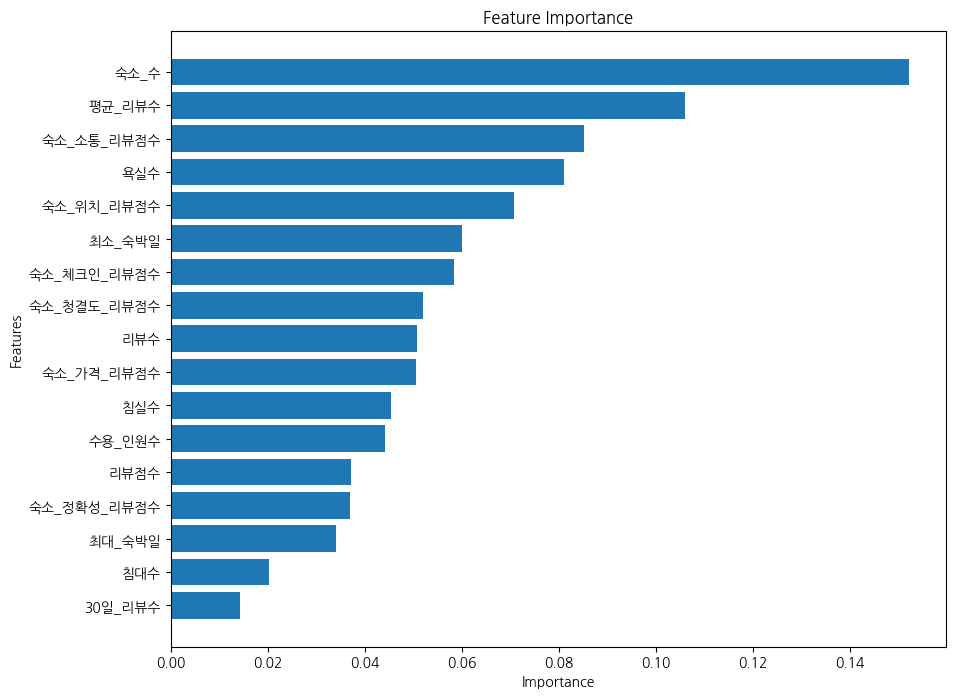

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# df_all_clean 데이터에서 '숙소_가격'을 타겟 변수로 설정
X = df_all_clean.drop('숙소_가격', axis=1)
y = df_all_clean['숙소_가격']

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# 피처 중요도
feature_importances = model.feature_importances_

# 중요도가 높은 순서대로 피처 이름과 중요도를 출력
features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)
for feature, importance in features:
    print(f'{feature}: {importance}')

# 피처 중요도 시각화
plt.figure(figsize=(10,8))
plt.barh([feature for feature, importance in features], [importance for feature, importance in features])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


결과 확인 : 숙소_가격에 영향을 미치는 주요 요인들
 - 숙소_수
 - 평균_리뷰수
 - 숙소_소통_리뷰점수
 - 욕실수
 - 숙소_위치_리뷰점수

??? 이게 맞나?
 - 다시 PCA를 진행(처음 코드 짤 떄 뭔가 잘 못한듯.. iris 예제 보고 작성해야지)

PCA와 랜덤 포레스트 돌린 후
 - 숙소_가격에 영향을 끼치는 데이터를 찾으려고 했는데... 이상해보이는 컬럼들이 선택이 됨.
 - 이게 맞나 의심이 감.
 - null값을 다 진행하고 분석 과정 중 문제가 되었던 범주형 데이터(슈퍼호스트, 숙소_지역, 숙소_유형, 숙소_특징)을 제거했던게 문제인가?


범주형 데이터 원핫 인코딩 이후
 - 컬럼수가 100개가 되어서 확인이 어려움.
 - 차라리 예진님이 진행했던, 상관계수 참고해서 진행하는게 나을듯...